In [6]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

In [3]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
HTML("""<style>
h1 {
  font-family: 'Permanent Marker', cursive;
  text-align: center;
  color: red;
  
}
ol {
  list-style-position: inside;
  margin-left: 1em;
  list-style-position: outside;
}
h2 {
  font-family: 'Permanent Marker', cursive;
  color: blue;
}
h3 {
  font-family: 'Permanent Marker', cursive;

}
</style>""")

# TD_10_2 - Parcours de graphes

Ce cours est une version "jupyter notebook" du [cours proposé par Stéphan Van Zuijlen](http://isn-icn-ljm.pagesperso-orange.fr/NSI-TLE/co/section_chapitre3.html)

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph 
import matplotlib.image as mpimg
%matplotlib notebook

## La méthode BFS (Breadth First Search) ou parcours en largeur

Parcourir un graphe en largeur à partir d’un sommet, consiste à visiter le sommet puis ses enfants, puis les enfants de ses enfants... etc ...  
  
Pour cela, il faut utiliser une file et une liste pour marquer les sommets visités.  
  
Prenons en exemple le graphe ci-dessous:

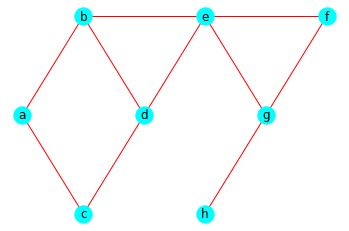

In [7]:
G = nx.DiGraph([("a","b"), ("a","c"), ("b","d"), ("c","d"),
                ("b","e"), ("d","e"), ("e","g"), ("e","f"),
                ("f","g"), ("g","h")])
G.nodes["a"]['pos'] = "0,10!"
G.nodes["b"]['pos'] = "10,20!"
G.nodes["c"]['pos'] = "10,0!"
G.nodes["d"]['pos'] = "20,10!"
G.nodes["e"]['pos'] = "30,20!"
G.nodes["f"]['pos'] = "50,20!"
G.nodes["g"]['pos'] = "40,10!"
G.nodes["h"]['pos'] = "30,0!"


pos = graphviz_layout(G)

plt.figure("cycle")
nx.draw_networkx_nodes(G, pos, node_color="cyan")
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=False)
plt.box(False)
plt.show()

On dispose d’un graphe(G), d’une liste (sommet_visité) et d’une file(f).  
Le sommet de départ est par exemple ’b’, **on l’enfile**.  
Puis **tant que la file n’est pas vide**:  
* On **défile** f dans une variable par exemple tmp  
* **Si tmp n’est pas dans sommet_visité**  
  * On l’ajoute à sommet_visité
* **Pour chaque voisin de tmp**  
  * **S’il n’est ni dans sommet_visité ni dans la file**  
    * On **l’enfile**
* On renvoie sommet_visité  
  
Voici les contenus des variables au premier tour de la boucle tant que:

[('a', 'b', {}), ('a', 'c', {}), ('b', 'd', {}), ('b', 'e', {}), ('c', 'd', {}), ('d', 'e', {}), ('e', 'g', {}), ('e', 'f', {}), ('g', 'h', {}), ('f', 'g', {})]


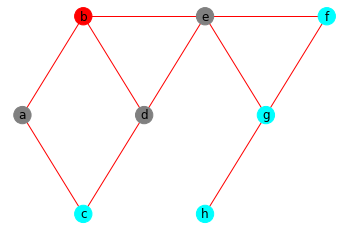

In [15]:
G.nodes["a"]['pos'] = "0,10!"
G.nodes["b"]['pos'] = "10,20!"
G.nodes["c"]['pos'] = "10,0!"
G.nodes["d"]['pos'] = "20,10!"
G.nodes["e"]['pos'] = "30,20!"
G.nodes["f"]['pos'] = "50,20!"
G.nodes["g"]['pos'] = "40,10!"
G.nodes["h"]['pos'] = "30,0!"


pos = graphviz_layout(G)
color_map = []
print(G.edges.data())
for node in G:
    if node == 'b':
        color_map.append('red')
    elif node in ['a','e','d']: 
        color_map.append('gray')
    else:
        color_map.append('cyan')

plt.figure("cycle2")
nx.draw_networkx_nodes(G, pos, node_color=color_map)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=False)
plt.box(False)
plt.show()